In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import sys

In [2]:
assert hasattr(tf,"function")

## Load MNIST Fashion dataset

In [3]:
#On charge le dataset de tf.keras
fashion_mnist = tf.keras.datasets.fashion_mnist

#On prend seulement les images et les targets de ce datasets
(images, targets), (_,_) = fashion_mnist.load_data()

#On prend seulement un sample de 10000 images et targets
images = images[:10000]
targets = targets[:10000]
print(images.shape)
print(targets.shape)

(10000, 28, 28)
(10000,)


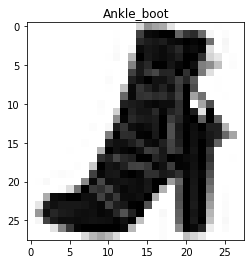

In [4]:
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle_boot"]

#Plot une image
plt.imshow(images[11], cmap="binary")
plt.title(targets_names[targets[11]])
plt.show()

## Transformation de l'image 2d en un seul vecteur

In [5]:
# Création du model

#Création d'un model de type séquence
model = tf.keras.models.Sequential()

#On ajoute une opération de type Flattent(on applatit l'image) de l'entrée un image de 28*28
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))

print("Shape de l'image", images[0:1].shape)

#On lance la prédiction ce qui fait seulement l'applatissement de l'image pour l'instant avec une image en input
model_output = model.predict(images[0:1])
print("Shape de l'image après la transformation", model_output.shape)

Shape de l'image (1, 28, 28)
Shape de l'image après la transformation (1, 784)


## Ajout des layers

In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))

#On ajoute une opération dense à la séquence pour définir un layer de 256 neurone sur cette couche et prendra en entrée l'opération précedente de Flattent donc elle prendre les 784 neurone de la couche précédente.
model.add(tf.keras.layers.Dense(256, activation="relu"))

#On ajoute un autre layers de 128 neurone 
model.add(tf.keras.layers.Dense(128,activation="relu"))

#On ajoute les dix neurone de sortie pour chacune des classes définit. Le softmax permet d'arrondir le nombre et d'afficher le 1 seulement sur celui qui à la plus haut score de prédiction
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model_output = model.predict(images[0:1])
print(model_output,targets[0:1])

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 2.41229367e-33 9.99945045e-01 5.50042860e-05
  1.00364615e-19 0.00000000e+00]] [9]


In [7]:
# On affiche un résumé des différentes opérations dans le model 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [8]:
#définition de l'erreur (loss) avec la function d'erreur crossentropy
#définition de l'optimizer qui utilise le principe de la déscente de gradient
#On veut avoir l'accuracy en metrics qui permet d'avoir un pourcentage de réussite
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

In [9]:
#Lancement du train avec en entrée les images, les targets et on le fait 10 fois avec une réduction de l'erreur à chaque fois
history = model.fit(images ,targets, epochs=10)

Epoch 1/10
313/313 [==============================] - 6s 13ms/step - loss: 69041839420.8388 - accuracy: 0.1019
Epoch 2/10
313/313 [==============================] - 3s 10ms/step - loss: 2.3028 - accuracy: 0.1060
Epoch 3/10
313/313 [==============================] - 3s 11ms/step - loss: 2.3029 - accuracy: 0.0968
Epoch 4/10
313/313 [==============================] - 2s 5ms/step - loss: 2.3026 - accuracy: 0.1010
Epoch 5/10
313/313 [==============================] - 1s 5ms/step - loss: 2.3021 - accuracy: 0.1013
Epoch 6/10
313/313 [==============================] - 2s 7ms/step - loss: 2.3023 - accuracy: 0.1001
Epoch 7/10
313/313 [==============================] - 2s 6ms/step - loss: 2.3022 - accuracy: 0.1055
Epoch 8/10
313/313 [==============================] - 2s 8ms/step - loss: 2.3022 - accuracy: 0.1053
Epoch 9/10
313/313 [==============================] - 3s 9ms/step - loss: 2.3019 - accuracy: 0.1035
Epoch 10/10
313/313 [==============================] - 2s 6ms/step - loss: 2.3025 - acc

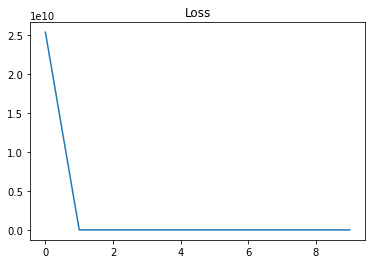

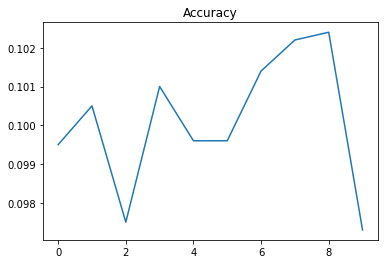

In [13]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]
plt.plot(loss_curve)
plt.title("Loss")
plt.show()

plt.plot(acc_curve)
plt.title("Accuracy")
plt.show()